**Проект Яндекс.Практикума. Сборный проект (предобработка, исследовательский и статистический анализ данных)**

**Курс: Аналитик данных**

---



**СОДЕРЖАНИЕ**

---
[**Описание проекта**](#description)

[**Импорт библиотек и загрузка данных**](#loading)

[**Предобработка данных**](#preparing)

[**Исследовательский анализ данных (EDA)**](#EDA)

[**Портрет жителя каждого региона**](#portrait)

[**Формулировка и проверка статистических гипотез**](#hypotheses)

[**Выводы и рекомендации**](#summary)

---




## **Описание проекта**<a  class="anchor" id="description"></a>

**Описание данных**

##  **Импорт библиотек и загрузка данных**<a  class="anchor" id="loading"></a>

**Импорт библиотек**

---



In [1]:
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt

import numpy as np
from scipy import stats as st
from statsmodels.graphics.gofplots import qqplot

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Загрузка данных**

---



In [2]:
try:
    df=pd.DataFrame(pd.read_csv(' '))
    
except:
    url='https://drive.google.com/file/d/ /view?usp=sharing'
    url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
    df=pd.read_csv(url2)

In [3]:
# устанавливаем параметры отображения данных
pd.set_option("precision", 2)
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_colwidth', 40)


## **Предобработка данных**<a  class="anchor" id="preparing"></a>

### **Изучение общей информации о доступных данных**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.sample(5,random_state=111)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
637,Riven: The Sequel to Myst,PC,1997.0,Adventure,1.52,0.82,0.0,0.10,83.0,NaN,E
9753,Moshi Monsters: Katsuma Unleashed,DS,2013.0,Action,0.00,0.11,0.0,0.01,NaN,tbd,E
12857,MotoGP 4 - Official Game of MotoGP,PS2,2005.0,Racing,0.03,0.02,0.0,0.01,NaN,NaN,NaN
10426,Kenka Bancho Bros: Tokyo Battle Royale,PSP,2012.0,Action,0.00,0.00,0.1,0.00,NaN,NaN,NaN
2037,Rock Band 2,Wii,2008.0,Misc,0.93,0.01,0.0,0.08,92.0,7.7,T


Таблица имеет колонки с неоптимальными или неверными типами данных. Считаем необходимым произвести следующие преобразования типов:
- год выпуска - к целочисленному типу (согласно описанию данных);
- оценка критиков - к целочисленному типу (согласно фактических значений);
- оценка пользователей - к вещественному типу (согласно имеющихся фактических значений, исключая 'tbd' - 'рейтинг еще не определен').

In [6]:
df.Critic_Score.value_counts().index.sort_values()

Float64Index([13.0, 17.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0,
              28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0,
              39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0,
              50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0,
              61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0,
              72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0,
              83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0,
              94.0, 95.0, 96.0, 97.0, 98.0],
             dtype='float64')

In [7]:
df.User_Score.value_counts().index.sort_values()

Index(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2', '1.3',
       '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2', '2.3',
       '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2', '3.3',
       '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2', '4.3',
       '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2', '5.3',
       '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2', '6.3',
       '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2', '7.3',
       '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2', '8.3',
       '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2', '9.3',
       '9.4', '9.5', '9.6', '9.7', 'tbd'],
      dtype='object')



---



Определим количество пропусков в полях данных и стратегию работы с ними.

In [8]:
def nan_checking(data):
    return pd.DataFrame(round((data.isna().mean()*100),2)).style.background_gradient('coolwarm')
nan_checking(df)

,0
Name,0.01
Platform,0.00
Year_of_Release,1.61
Genre,0.01
NA_sales,0.00
EU_sales,0.00
JP_sales,0.00
Other_sales,0.00
Critic_Score,51.32
User_Score,40.09


Небольшое количество пропусков имеются в ключевых полях "название игры", "год выпуска" и "жанр игры", от 0,01% до 1,61%. Считаем осточником этих пропусков ошибки формирования данных и их неполноту.

Так как строки с пропусками в этих колонках можно будет использовать в анализе продаж по платформам, принимаем решение не исключать их из датафрейма, заменив маркерами отсутствующих значений.

Значительное количество пропусков (от 40% до 51%) в данных наблюдается в полях оценок и рейтингов: оценка критиков и ползователей, рейтинг ESRB. Причинами появления этих пропусков в данных могут служить нарушения и ошибки при формировании таблицы. 
- В США продажа цифровой продукции игровой и развлекательной направленности без присвоения рейтинга может повлечь санкции. Отсутствие рейтинга у игры при наличии данных об объемах ее продаж в Северной Америке (включая США) маловероятно.

In [9]:
missing_ratings=df[df.User_Score.isna()].join(df[df.Critic_Score.isna()], how='inner',rsuffix='cs').join(df[df.Rating.isna()], how='inner',rsuffix='r').shape[0]/df.shape[0]
print(f'Оценки и рейтинги одновременно отсутствуют у {missing_ratings:.1%} записей таблицы.')

Оценки и рейтинги одновременно отсутствуют у 39.6% записей таблицы.


Для полноты и достоверности исследования, считаем необходимым сохранить записи с пропусками. 
Являющиеся пропущенными значения считаем целесообразным заполнить маркерами отсутствующих значений. 


---



#### **Приведение типов данных в столбцах и обработка пропусков**

Приведем названия столбцов к нижнему регистру.

In [10]:
df.columns=[x.lower() for x in df.columns]



---



Обработаем пропуски (заменой на маркер отсутствующего значения "-") в столбцах "название игры" и "жанр игры".

In [11]:
df.name.fillna('-', inplace=True)
df.genre.fillna('-', inplace=True)



---



 Достоверно восстановить пропуски в столбце "год выпуска" затруднительно. Например, данные с портала https://www.vgchartz.com/, публикующего еженедельную статистику по продажам видеоигр с 2005 года, содержат те же самые пропуски года релиза. 

Произведем замену пропущенных значений в столбце "год выпуска" на маркер отсутствующих данных - 0.

In [12]:
df.year_of_release.fillna(0, inplace=True)

Приведем тип столбца "год выпуска" к более соотвествующему целочисленному  (Int64).

In [13]:
df.year_of_release=df.year_of_release.astype('int64')



---



По столбцам оценок и рейтинга привлечение дополнительной информации для заполнения пропусков считаем невозможным и нецелесообразным:
- источник оценок критиков и пользователей в описании данных не приводится;
- официальный сайт ESRB (https://www.esrb.org/) предосталяет доступ к рейтингам только на основе поиска по единичному названию.

Исходя из вышеизложенного произведем замену пропущенных значений на маркеры их отсутствия: "-1" для столбцов оценок и "-" для столбца рейтинга.

In [14]:
df.critic_score.fillna(int(-1), inplace=True)
df.user_score.fillna(int(-1), inplace=True)
df.rating.fillna('-', inplace=True)



---



В столбце "оценка пользователей" присутствует еще один маркер отсутствующих значений 'tbd' - "to be determined" (в процессе определения). Можно предположить, что этот плейсхолдер попал в таблицу на этапе ее формирования, для замещения значений, по которым недостаточно данных для расчета скора.
Данное значение аналогично пропуску и подлежит обработке соотвествующим образом.

In [15]:
print(f'Доля значений "оценка определяется" в общем количестве записей: {df[df.user_score=="tbd"].shape[0]/df.shape[0]:.1%}')

Доля значений "оценка определяется" в общем количестве записей: 14.5%


In [16]:
df['user_score']=df['user_score'].replace('tbd',int(-1))

Приведем тип столбца "оценка пользователей" к более соотвествующему вещественному (Float64).

In [17]:
df.user_score=df.user_score.astype('float64')



---



Приведем тип столбца "оценка критиков" к более соотвествующему целочисленному (Int64).

In [18]:
df.critic_score=df.critic_score.astype('int64')



---



#### **Добавление данных в датафрейм**

Добавим в данные столбец, содержащий суммарные продажи во всех регионах.

In [19]:
df['total_sales']=df.na_sales+df.eu_sales+df.jp_sales+df.other_sales



---




## **Исследовательский анализ данных (EDA)**<a  class="anchor" id="EDA"></a>



#### **Исследование жизненного цикла платформ**

Проанализируем количество игр, выпускавшихся с 1980 по 2016 год.

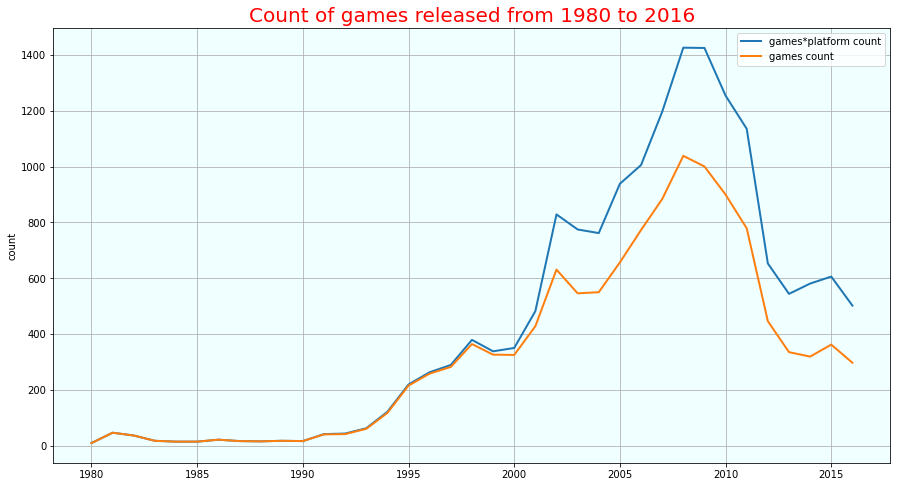

In [20]:
fig, ax = plt.subplots(figsize=(15, 8))
data=df[df['year_of_release']!=0].pivot_table(index='year_of_release', values='total_sales', aggfunc='count')
data_2=df[df['year_of_release']!=0].pivot_table(index='year_of_release', values='name', aggfunc=lambda x: len(x.unique()))
ax.plot(data,linewidth=2,label='games*platform count')
ax.plot(data_2,linewidth=2,label='games count')
ax.title.set_text('Count of games released from 1980 to 2016')
ax.title.set_fontsize(20)
ax.title.set_color('red')
ax.set_ylabel('count')
ax.set_facecolor('azure')
ax.grid()
ax.legend()
plt.show()

После экспоненциального роста количества игр, платформ и релизов для них с 1980 по 2007 год, с развитием сети интернет, вызвавшем смещение  потребления развлекательного информационного контента, произошло стремительное падение числа новинок.

С 2013 года количество новых игр стабилизировалось в интервале 300-400 в год (500-600 по релизам для различных платформ).

Таким образом, в связи с изменчивостью рынка компьютерных игр, не все периоды, данные за которые представлены, подходят для дальнейшего исследования (данные по платформам, популярным в период пика могут исказить результаты исследования).

Построим графики количества проданных копий релизов для 10 платформ с крупнейшими объемами продаж. 

In [21]:
lagest_platform=df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales',ascending=False).head(10)

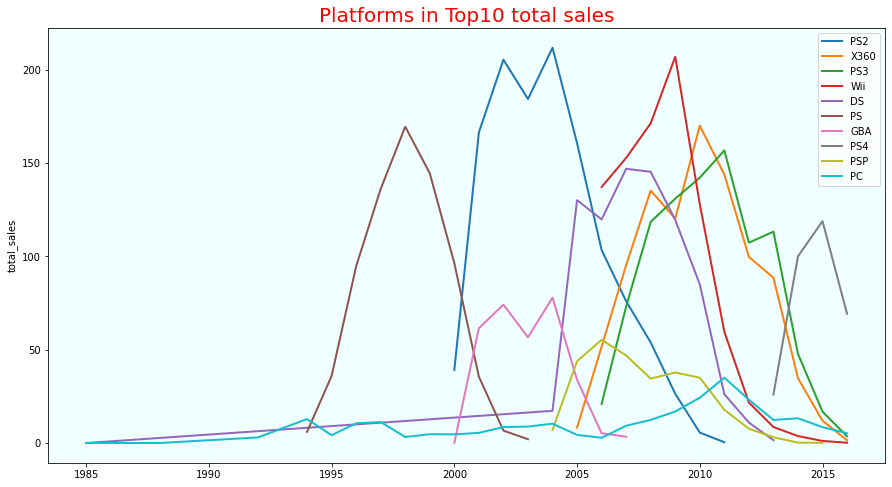

In [22]:
fig, ax = plt.subplots(figsize=(15, 8))
for pltf in lagest_platform.index:
    data=df.query('(platform==@pltf)and(year_of_release!=0)').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    ax.plot(data,linewidth=2,label=pltf)
ax.title.set_text('Platforms in Top10 total sales')
ax.title.set_fontsize(20)
ax.title.set_color('red')
ax.set_ylabel('total_sales')
ax.set_facecolor('azure')
ax.legend()
plt.show()

График демонстрирует необходимость учитывать при анализе жизненный цикл платформ для релизов игр. Очевидно, что, как минимум, четыре платформы из 10, для которых продажи копий были наибольшими, более не используются производителями игр для релизов (PlayStation, PlayStation2, 
Game Boy Advance, 
Nintendo DS).

Определим среднюю продолжительность жизненного цикла для игровых платформ. 

In [23]:
platforms=df['platform'].unique()
result_table=[]
for pltf in platforms:
    data=df.query('(platform==@pltf)and(year_of_release!=0)').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    result_table.append([pltf,data.index.min(),data.index.max()])
platform_life_cycle=pd.DataFrame(result_table, columns=['platform','sales_start','sales_finish'])
platform_life_cycle['lifetime']=platform_life_cycle.sales_finish-platform_life_cycle.sales_start

In [24]:
def boxplot_hist(df,col,title,xlab,ylab):
    def my_bins(df,col):
        if df[col].max() > 100:
            return 50
        elif df[col].max() > 500:
            return  100
        elif df[col].max() > 1000:
            return  200
        else: return 20
        
    fig = plt.figure(figsize =(10, 10))
    ax1 = fig.add_subplot(2,1,1)
    ax2 = fig.add_subplot(2,1,2)

    title=title
    ax1.title.set_text(title)
    ax1.title.set_color('red')
    ax1.title.set_size(20)
    
    ax2.set_xlabel(xlab, fontsize=14,color='black')
    ax2.set_ylabel(ylab, fontsize=14,color='black')

    ax1.boxplot(df[col], notch=True, sym="o",vert=False, widths = 0.1, patch_artist = True)
    ax1.tick_params(axis = 'both', which = 'both', direction = 'inout', length = 10, width = 3, color = 'black', pad = 10, labelsize = 14, labelcolor = 'black')
    ax1.grid()

    ax2.hist(df[col], bins=my_bins(df,col),  alpha=0.5, ec='black', color='green',)
    ax2.axvline(x=df[col].median(), linewidth=3, color='red', linestyle='--')
    ax2.axvline(x=df[col].quantile(.05), linewidth=3,  color='y', linestyle='--')
    ax2.axvline(x=df[col].quantile(.95), linewidth=3, color='y', linestyle='--')
    ax2.tick_params(axis = 'both', which = 'both', direction = 'inout', length = 10, width = 3, color = 'black', pad = 10, labelsize = 14, labelcolor = 'black')
    plt.grid()
    fig.tight_layout()
    plt.show()

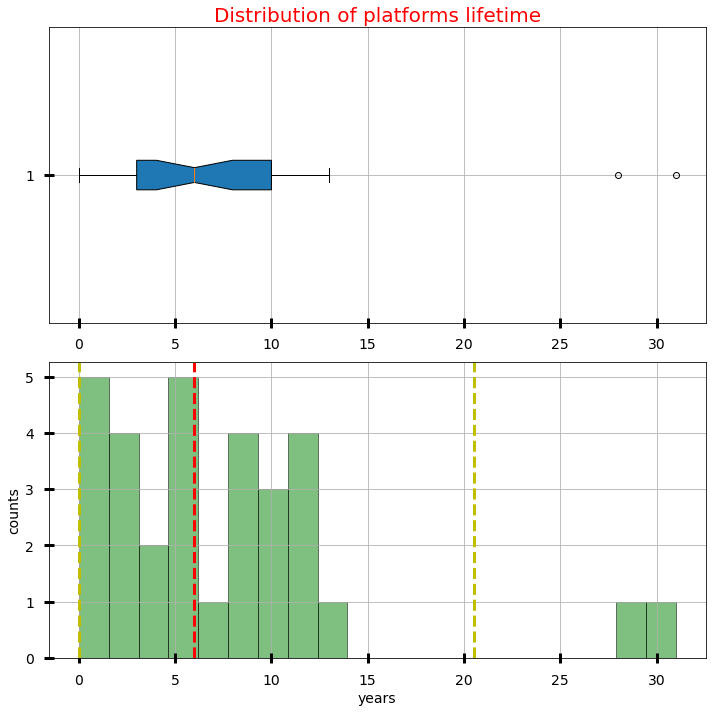

In [25]:
boxplot_hist(platform_life_cycle,'lifetime','Distribution of platforms lifetime','years','counts')

Для расчета средней продолжительности активности игровой платформы возьмем данные без усчета PC, так как это агрегированное наименование для ПЭВМ разных поколений. Так же не будем учитывать данные по Nintendo DS, так как они содержат ошибки: Nintendo DS появилась в 2004 году, данные от 1985 года, скорее всего, отностятся к платформе NES.

In [26]:
platform_life_cycle.query('(platform!="DS")and(platform!="PC")and(sales_finish<2015)').lifetime.describe().apply(lambda x: format(x, '.1f'))


count    20.0
mean      5.8
std       4.2
min       0.0
25%       1.8
50%       6.0
75%       9.0
max      13.0
Name: lifetime, dtype: object

Жизненный цикл платформ в современных условиях составляет в среднем 6 лет. После чего релизы для этих платформ прекращаются, и, предполгаем, снижаются продажи копий уже выпущенных игр. 
С целью использования выводов исследования для прогнозирования продаж, считаем целесообразным предварительно ограничить горизонт данных отрезком от 2009 до 2016 года.



---



#### **Определение актуального периода данных**

Для ограничения актуального периода в данных для исследования, определим платформы, для которых производители игр осуществляют релизы на дату исследования (декабрь 2016). Так как данные за 2016 год могут быть не полными, ограничим дату отсечения "мертвых" платформ 2015 годом.

In [27]:
platforms_alive=platform_life_cycle.query('sales_finish>=2015').platform
platforms_alive

0      Wii
4     X360
5      PS3
9      PS4
10     3DS
14      PC
16     PSP
17    XOne
18    WiiU
22     PSV
Name: platform, dtype: object

Построим графики количества проданных копий игр для платформ, релизы для которых продолжались в 2015-2016 годах.

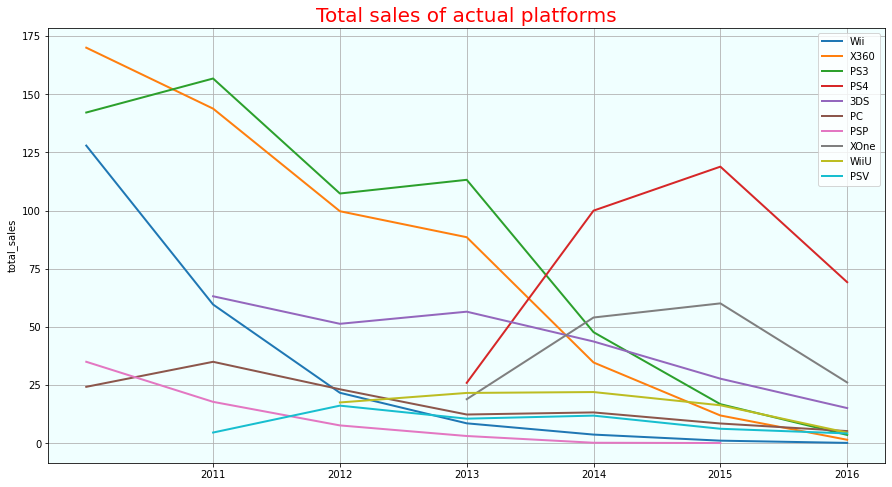

In [28]:
fig, ax = plt.subplots(figsize=(15, 8))
for pltf in platforms_alive:
    data=df.query('(platform==@pltf)and(year_of_release>2009)').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    ax.plot(data,linewidth=2,label=pltf)
ax.title.set_text('Total sales of actual platforms')
ax.title.set_fontsize(20)
ax.title.set_color('red')
ax.set_xticks(data.index)
ax.set_ylabel('total_sales')
ax.set_facecolor('azure')
ax.grid()
ax.legend()
plt.show()

График позволяет нам ограничить актуальный период данных для исследования 2013 годом: для игр, выпущенных в период с 2013 по 2016 год, структура данных по платформам будет максимально отражать ситуацию, которая станет характерна для релизов в 2017 году.

In [29]:
print(f'Актуальные данные для анализа платформ составят: {df.query("year_of_release>=2013").shape[0]/df.shape[0]:.1%} от общего количества записей.')

Актуальные данные для анализа платформ составят: 13.4% от общего количества записей.




---



#### **Анализ потенциально прибыльных платформ**

Для выявления потенциально прибыльных платформ построим для них графики количества релизов игр и проданных копий. 

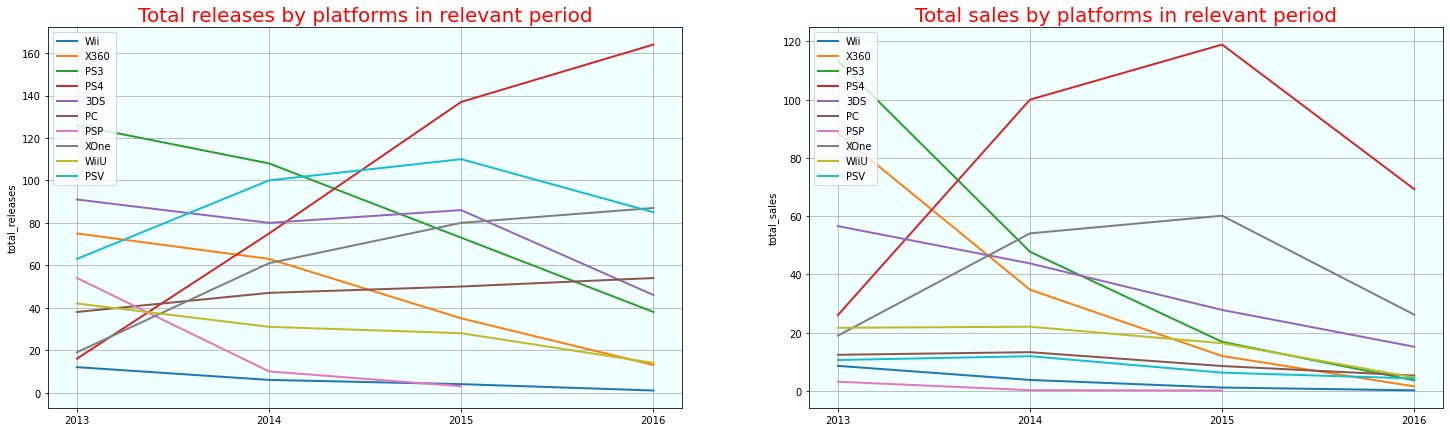

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(25, 7))
def axes_beautify(ax):
    ax.title.set_fontsize(20)
    ax.title.set_color('red')
    ax.set_xticks(data.index)
    ax.legend(loc='upper left')
    ax.grid()
    ax.set_facecolor('azure')

for pltf in platforms_alive:
    data=df.query('(platform==@pltf)and(year_of_release>=2013)').pivot_table(index='year_of_release', values='total_sales', aggfunc='count')
    axes[0].plot(data,linewidth=2,label=pltf)

axes[0].title.set_text('Total releases by platforms in relevant period')
axes[0].set_ylabel('total_releases')
axes_beautify(axes[0])

for pltf in platforms_alive:
    data=df.query('(platform==@pltf)and(year_of_release>=2013)').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    axes[1].plot(data,linewidth=2,label=pltf)

axes[1].title.set_text('Total sales by platforms in relevant period')   
axes[1].set_ylabel('total_sales')
axes_beautify(axes[1])

plt.show()

Потенциально прибыльными в 2017 году на основе имеющихся данных можно считать: PlayStation4, Xbox One, Nintendo 3DS. Первые две находятся в средине жизненного цикла, релизы на них и их продажи росли к 2016 году.

Кроме того, релизы игр на ПК к 2016 году также демонстрируют рост, эта платформа генерирует относительно стабильные продажи копий на протяжении всего периода данных.

Nintendo 3DS находится в нисходящей фазе жизненного цикла, релизы и продажи копий на эту консоль к 2016 году снижаются. 



---



Построим диаграммы размаха и частотные гистограммы для потенциально прибыльных платформ.

In [31]:
def boxplot_hist2(df1,df2,col,title1,title2,xlab,ylab):
    def my_bins(df,col):
        if df[col].max() > 100:
            return 50
        elif df[col].max() > 500:
            return  100
        elif df[col].max() > 1000:
            return  200
        else: return 20
    
    def spread_axes(ax1,ax2,title):
        ax1.title.set_text(title)
        ax1.title.set_color('red')
        ax1.title.set_size(20)
        ax1.boxplot(df1[col], notch=True, sym="o",vert=False, widths = 0.1, patch_artist = True)
        ax1.tick_params(axis = 'both', which = 'both', direction = 'inout', length = 10, width = 3, color = 'black', pad = 10, labelsize = 14, labelcolor = 'black')
        ax1.grid()
        
        ax2.set_xlabel(xlab, fontsize=14,color='black')
        ax2.set_ylabel(ylab, fontsize=14,color='black')
        ax2.hist(df1[col], bins=my_bins(df1,col),  alpha=0.5, ec='black', color='green',)
        ax2.axvline(x=df1[col].median(), linewidth=3, color='red', linestyle='--')
        ax2.axvline(x=df1[col].quantile(.05), linewidth=3,  color='y', linestyle='--')
        ax2.axvline(x=df1[col].quantile(.95), linewidth=3, color='y', linestyle='--')
        ax2.tick_params(axis = 'both', which = 'both', direction = 'inout', length = 10, width = 3, color = 'black', pad = 10, labelsize = 14, labelcolor = 'black')
        ax2.grid()
    
    
    fig = plt.figure(figsize =(20, 10))
    ax1 = fig.add_subplot(2,2,1)
    ax2 = fig.add_subplot(2,2,3)
    spread_axes(ax1,ax2,title1)
    
    ax3 = fig.add_subplot(2,2,2)
    ax4 = fig.add_subplot(2,2,4)
    spread_axes(ax3,ax4,title2)
    
    fig.tight_layout()
    fig.subplots_adjust(wspace=0.2)
    plt.show()

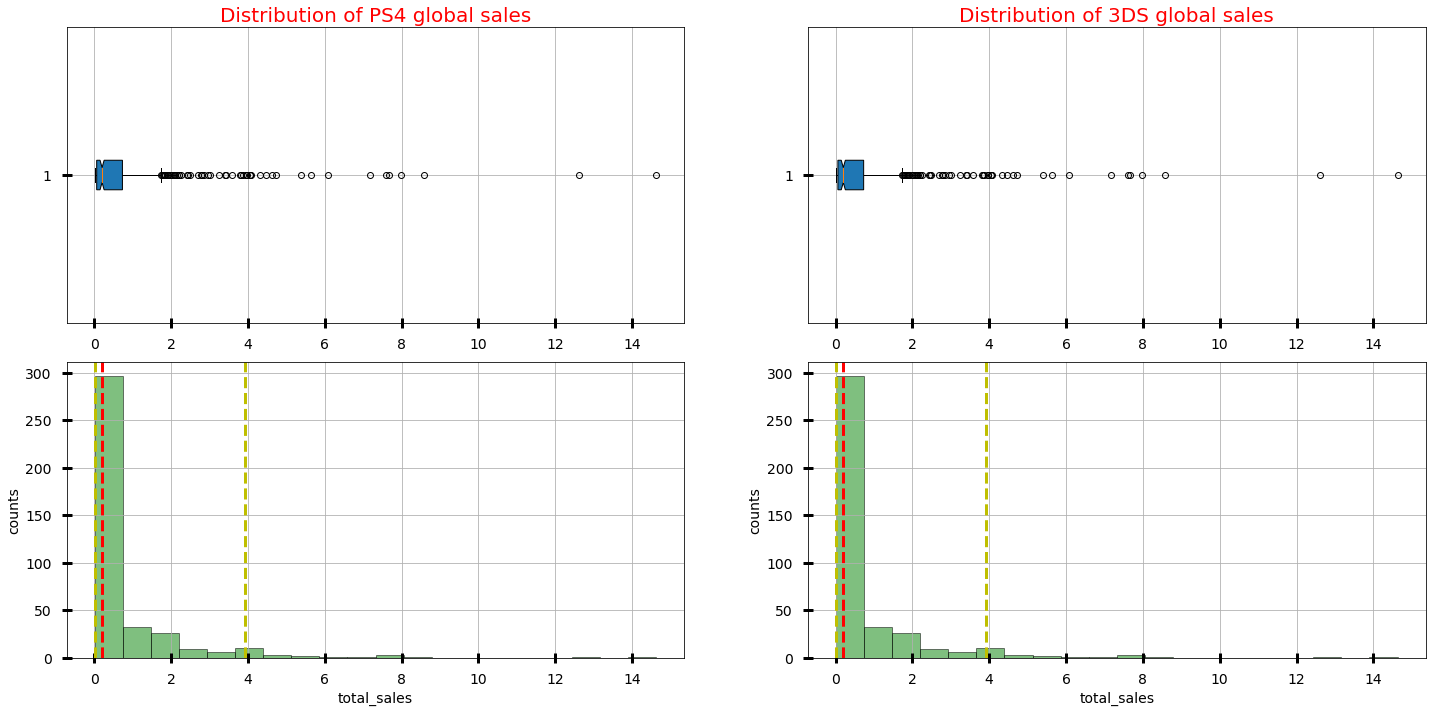

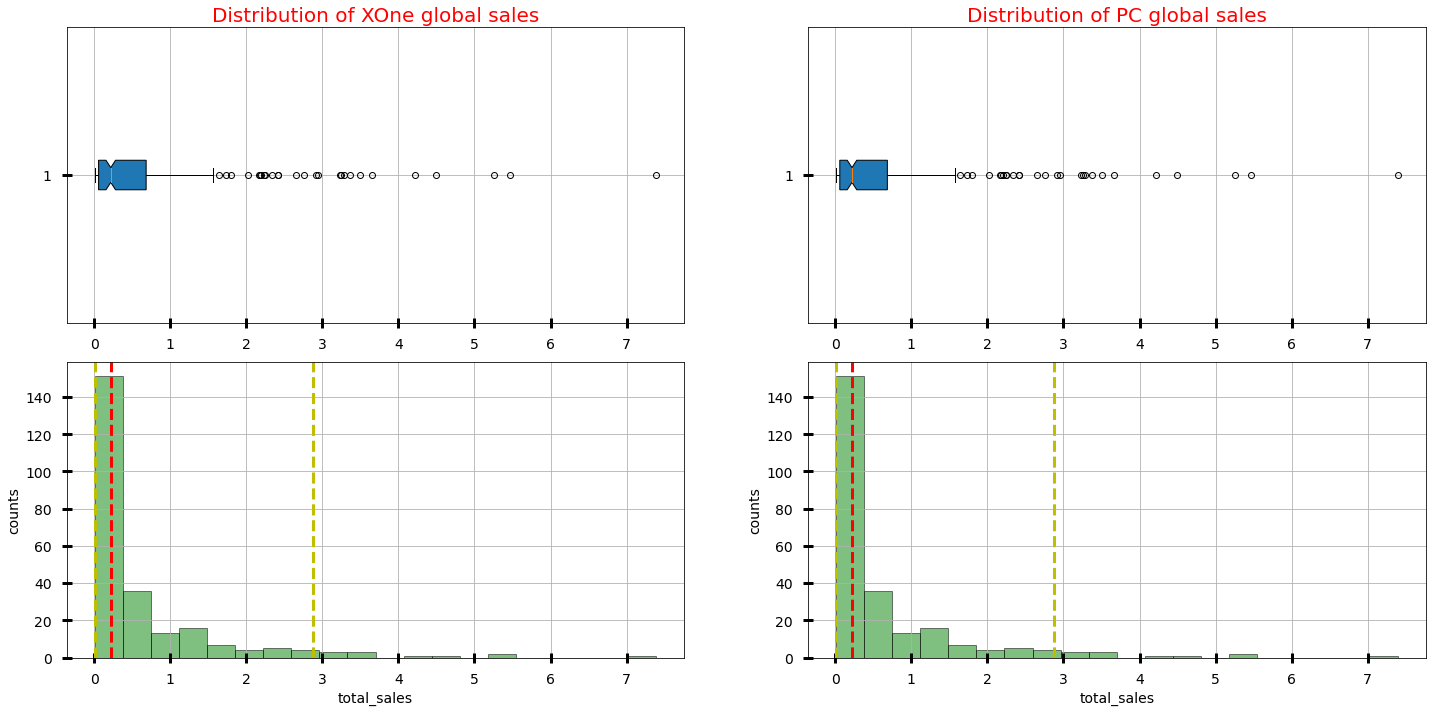

In [32]:
data1=df.query('(platform=="PS4")and(year_of_release>=2013)').pivot_table(index='name', values='total_sales', aggfunc='sum')
title1='Distribution of PS4 global sales'
data2=df.query('(platform=="3DS")and(year_of_release>=2013)').pivot_table(index='name', values='total_sales', aggfunc='sum')
title2='Distribution of 3DS global sales'
boxplot_hist2(data1,data2,'total_sales',title1,title2,'total_sales','counts')
data1=df.query('(platform=="XOne")and(year_of_release>=2013)').pivot_table(index='name', values='total_sales', aggfunc='sum')
title1='Distribution of XOne global sales'
data2=df.query('(platform=="PC")and(year_of_release>=2013)').pivot_table(index='name', values='total_sales', aggfunc='sum')
title2='Distribution of PC global sales'
boxplot_hist2(data1,data2,'total_sales',title1,title2,'total_sales','counts')

Диаграммы размаха для указанных платформ демонстрируют характерную картину:
- большинство игр продается тиражом до 300 000 копий;
- хиты продаж образуют "тостые хвосты" в данных.

Лидерами по широте игровой линейки являются PlayStation4 и Nintendo 3DS, на их долю приходится не только большинство мелкотиражных игр, но и самые большие хиты с количеством продаваемых копий более 14 млн. Данные по 3DS имеют более "толстый хвост": 95% квантиль у них находится на отметке в 2 раза ниже, чем у PS4 (около 2 млн. копий против почти 4 млн.), при одинаковой величине размаха.

Для Xbox One и ПК данные о проданных копиях игр, выпущенных в 2013-2016 годах, имеют меньший размах. Данные по Xbox One распределены более плотно, чем у PS4: при в 2 раза меньшем размахе, 95% квантиль у платформы от Microsoft лежит на отметке всего лишь, примерно, в 1,5 раза левее 95% квантиля для консоли от Sony. 

#### **Исследование влияния на продажи отзывов пользователей и критиков**

Для исследования взаимосвязи количества проданных копий игр и их оценок пользователями и критиками выберем данные за релевантный период по платформе PS4 (для которых существуют скор-значения).

In [33]:
games_for_PS4=df.query('(platform=="PS4")and(year_of_release>=2013)')
scores_for_PS4=games_for_PS4.query('(critic_score!=(-1))and(user_score!=(-1))')

Проанализируем интервалы чисел в значениях отзывов пользователей и критиков. Как можно заметить, для отображения двух оценок на одном графике, достаточно привести значения в столбце "оценки критиков" к первому порядку.

In [34]:
pd.DataFrame(scores_for_PS4.critic_score.describe().apply(lambda x: format(x, '.1f'))).join(pd.DataFrame(scores_for_PS4.user_score.describe().apply(lambda x: format(x, '.1f'))))

,critic_score,user_score
count,249.0,249.0
mean,72.1,6.7
std,12.6,1.5
min,19.0,1.5
25%,66.0,6.1
50%,74.0,7.0
75%,80.0,7.8
max,97.0,9.2


Добавим в таблицу столбец значений бальных отзывов критиков уменьшенных в 10 раз. Проверим корреляцию нового столбца.

In [35]:
scores_for_PS4['critic_score_reduced']=scores_for_PS4.critic_score/10

In [36]:
scores_for_PS4.corr().style.background_gradient('coolwarm')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales,critic_score_reduced
year_of_release,1.00,-0.26,-0.19,-0.12,-0.23,-0.02,0.15,-0.23,-0.02
na_sales,-0.26,1.00,0.71,0.53,0.92,0.41,-0.02,0.89,0.41
eu_sales,-0.19,0.71,1.00,0.52,0.94,0.35,-0.05,0.95,0.35
jp_sales,-0.12,0.53,0.52,1.00,0.57,0.32,0.17,0.59,0.32
other_sales,-0.23,0.92,0.94,0.57,1.00,0.41,-0.04,1.00,0.41
critic_score,-0.02,0.41,0.35,0.32,0.41,1.00,0.56,0.41,1.00
user_score,0.15,-0.02,-0.05,0.17,-0.04,0.56,1.00,-0.03,0.56
total_sales,-0.23,0.89,0.95,0.59,1.00,0.41,-0.03,1.00,0.41
critic_score_reduced,-0.02,0.41,0.35,0.32,0.41,1.00,0.56,0.41,1.00


Корреляция с глобальными продажами для нового столбца ожидаемо не отличается от столбца "отзывы критиков". Постоим диаграмму рассеяния для отзывов пользователей и критиков по отношению к глобальным продажам игр.

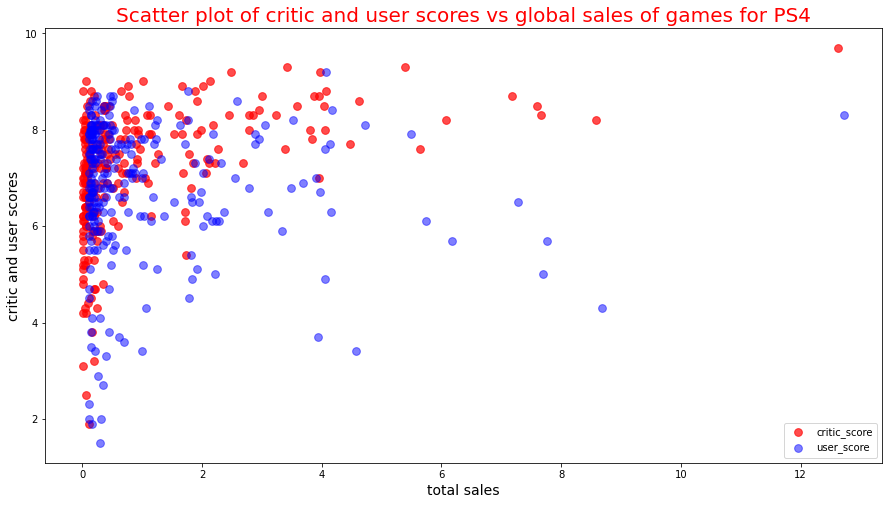

In [37]:
fig, ax = plt.subplots()

ax.scatter(scores_for_PS4.total_sales, scores_for_PS4.critic_score_reduced, c = 'r', alpha=0.7,s=60,label='critic_score')
ax.scatter(scores_for_PS4.total_sales+0.1, scores_for_PS4.user_score, c = 'b', alpha=0.5,s=60,label='user_score')
ax.set_title('Scatter plot of critic and user scores vs global sales of games for PS4')
ax.title.set_color('red')
ax.title.set_size(20)

ax.set_xlabel('total sales', fontsize=14,color='black')
ax.set_ylabel('critic and user scores', fontsize=14,color='black')

fig.set_figwidth(15)
fig.set_figheight(8)
ax.legend(loc='lower right')
plt.show()

График подтверждает данные вышеприведенной корреляционной таблицы, которые говорят от том, что высокие рейтинги у критиков и пользователей не помогают играм выходить в топ продаж (при условии, что на рынке нет дефицита предложения по высокорейтинговым играм). 

Оценки критиков больше коррелируют с объемами продаж. В то время как, против ожидания, многие игровые хиты имеют невысокие оценки пользователей. Исключение составляют единицы, например, GTA V, имеющая высокий рейтинг у критиков и сравнительно высокие отзывы пользователей.

Причинами более высокой корреляции отзывов критики видится репутационная отвественность последних.



---



Сравним зависимость глобальных продаж от отзывов критиков и пользователей на игры всех платформ за релевантный период.

In [38]:
games_since_2013=df.query('(year_of_release>=2013) and (critic_score!=(-1)) and (user_score!=(-1))')
games_since_2013['critic_score_reduced']=games_since_2013.critic_score/10

Построим диаграмму рассеяния для данных для всех платформ.

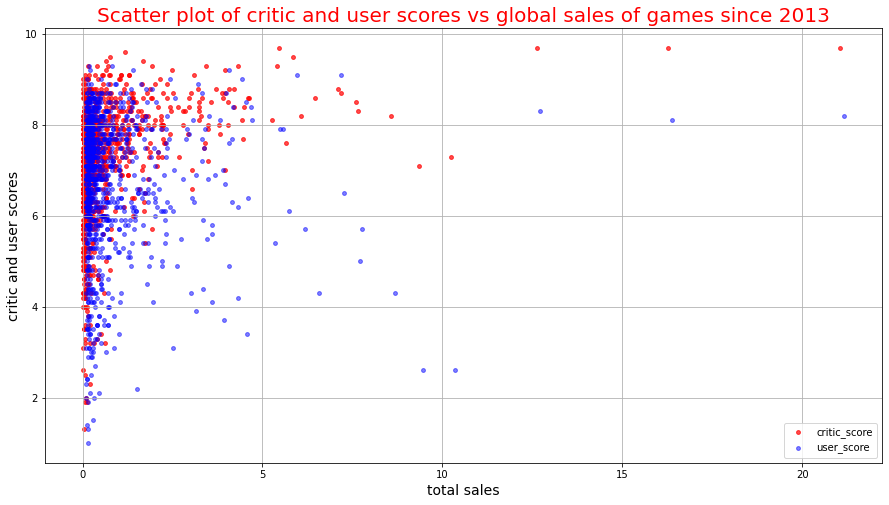

In [39]:
fig, ax = plt.subplots()

ax.scatter(games_since_2013.total_sales, games_since_2013.critic_score_reduced, c = 'r', alpha=0.7,s=15,label='critic_score')
ax.scatter(games_since_2013.total_sales+0.1, games_since_2013.user_score, c = 'b', alpha=0.5,s=15,label='user_score')
ax.set_title('Scatter plot of critic and user scores vs global sales of games since 2013')
ax.title.set_color('red')
ax.title.set_size(20)

ax.set_xlabel('total sales', fontsize=14,color='black')
ax.set_ylabel('critic and user scores', fontsize=14,color='black')

fig.set_figwidth(15)
fig.set_figheight(8)
ax.legend(loc='lower right')
ax.grid()
plt.show()

График имеет много общего с подобным для PS4: значения сосредоточены в левом верхнем углу, это означает, что большим значениям одного признака соотвествуют меньшие значения другого. 

Это свидетельствует, как минимум, о слабой прямой корреляции между рейтингами критиков и пользователей и продажами копий игр в глобальном масштабе. Хотя, взаимосвязь оценок критиков для игр на PS4 и их продаж почти в два раза более сильная, чем в совокупности по рынку.



In [40]:
print(f"Коэффициент корреляции глобальных продаж по играм для всех платформ с отзывами критиков: {games_since_2013.total_sales.corr(games_since_2013.critic_score):.3f}, с отзывами пользователей: {games_since_2013.total_sales.corr(games_since_2013.user_score):.3f}")

Коэффициент корреляции глобальных продаж по играм для всех платформ с отзывами критиков: 0.312, с отзывами пользователей: -0.004



Рассчитанная взаимосвязь "продажи-отзывы пользователей", как и для PS4, для всех платформ в совокупности также находится в облати ноля.



---



#### **Исследование жанров компьютерных игр.**

Для анализа распределения продаж копий иг по жанрам создадим таблицу, содержащую наименование жанра, количество выпущенных в жаноре игр, количество проданных копий по всем платфомам.

In [41]:
games_since_2013=df.query('year_of_release>=2013')
games_by_genre=games_since_2013.pivot_table(index='genre', values='name', aggfunc=lambda x: len(x.unique())).sort_values(by='name',ascending=False)

Добавим в таблицу столбец, характеризующий прибыльность жанра: количество проданных копий на одну игру (проданный тираж).

In [42]:
games_by_genre=games_by_genre.join(games_since_2013.pivot_table(index='genre', values='total_sales', aggfunc='sum'))
games_by_genre['sales_per_game']=games_by_genre.total_sales/games_by_genre.name

Построим диаграммы, представляющие популярные жанры по количеству релизов и жанры по среднему тиражу копий.

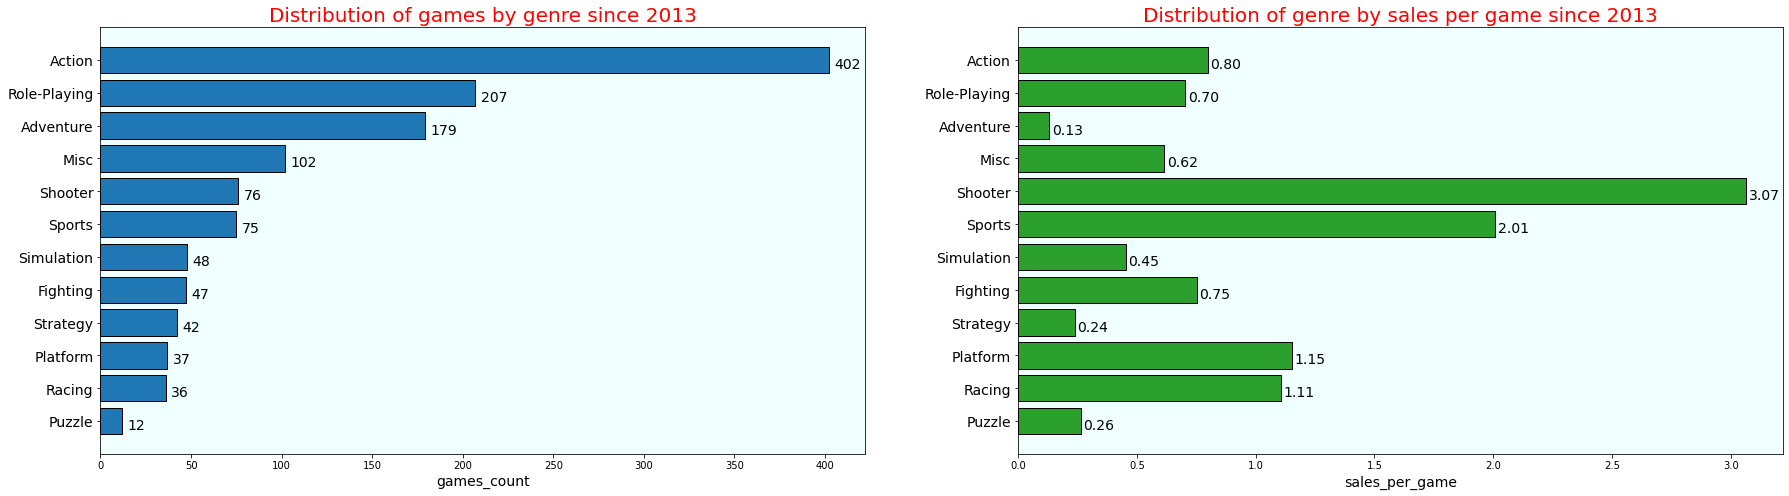

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(25, 7))
axes[0].barh(games_by_genre.index, games_by_genre.name, align='center',ec='black')
axes[0].set_yticks(games_by_genre.index)
axes[0].set_yticklabels(games_by_genre.index, fontsize=14,color='black')
axes[0].invert_yaxis()
axes[0].set_xlabel('games_count', fontsize=14,color='black')
axes[0].set_title('Distribution of games by genre since 2013')
axes[0].title.set_fontsize(20)
axes[0].title.set_color('red')
for i, v in enumerate(games_by_genre.name):
    axes[0].text(v + 3, i + .25, str(v), fontsize=14,color='black')
axes[0].set_facecolor('azure')

axes[1].barh(games_by_genre.index, games_by_genre.sales_per_game, align='center',ec='black', color='tab:green')

axes[1].set_yticks(games_by_genre.index)
axes[1].set_yticklabels(games_by_genre.index, fontsize=14,color='black')
axes[1].invert_yaxis()
axes[1].set_xlabel('sales_per_game', fontsize=14,color='black')
axes[1].set_title('Distribution of genre by sales per game since 2013')
axes[1].title.set_fontsize(20)
axes[1].title.set_color('red')
for i, v in enumerate(games_by_genre.sales_per_game):
    axes[1].text(v+0.01, i + .25,format(v, '.2f'), fontsize=14,color='black')
axes[1].set_facecolor('azure')
fig.tight_layout()
fig.subplots_adjust(wspace=0.2)
plt.show()

На графиках предствалено, что существуют жанры являющиеся лидерами у фирм-разработчиков по количеству релизов. Это жанр экшн, РПГ и приключения, в то же время игры-головоломки, гонки и аркады менее популярны у производителей игрового контента.

Однако, анализируя средний тираж игр разных жанров, можно заметить в некотором роде противоположную ситуацию: аркады и гонки превосходят по тиражам релиз-лидеров. Наименьшими тиражами распродаются игры в жанре приключений.

Но, наиболее прибыльными (условно) являются жанры, "канализаторы адреналина": спортивные симуляторы и шутеры. Относительно высокие продажи демонстрирует ранее не упомянутый жанр - файтинг (турниры).



---



## **Портрет пользователя каждого региона**<a class="anchor" id="portrait"></a>

Оценим самые популярные платформы для пользователей разных регионов на основе данных количестве проданных копий игр.

In [44]:
NA_platform_top5=df.query('year_of_release>=2013').pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales',ascending=False).head(5)
EU_platform_top5=df.query('year_of_release>=2013').pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',ascending=False).head(5)
JP_platform_top5=df.query('year_of_release>=2013').pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',ascending=False).head(5)

Добавим столбец, отражающий долю каждой платформы в суммарных продажах Топ5-платформ по регионам. 

In [45]:
NA_platform_top5['na_share_of_sales']=NA_platform_top5.na_sales/sum(NA_platform_top5.na_sales)
EU_platform_top5['eu_share_of_sales']=EU_platform_top5.eu_sales/sum(EU_platform_top5.eu_sales)
JP_platform_top5['jp_share_of_sales']=JP_platform_top5.jp_sales/sum(JP_platform_top5.jp_sales)

In [46]:
platforms_by_region=NA_platform_top5.join(EU_platform_top5,how='outer').join(JP_platform_top5,how='outer').fillna(0)

В топ 5 по продажам в регионах входят 7 платформ. Построим графически распределение долей.

In [47]:
def bars_plot(data, n, title, xlabel, ylabel):
    fig, ax = plt.subplots()
    x=np.arange(1,n+1)
    bar1=ax.bar(x-0.2, data.na_share_of_sales, width=0.2, ec='black', align='center',label='North America')
    bar2=ax.bar(x, data.eu_share_of_sales, width=0.2, color='tab:green', ec='black', align='center',label='Europ')
    bar3=ax.bar(x+0.2, data.jp_share_of_sales, width=0.2, color='tab:red', ec='black', align='center',label='Japan')
    ax.set_xticks(x)
    ax.set_xticklabels(data.index, fontsize=20,color='black')

    def autolabel(bars):
        for bar in bars:
            h = bar.get_height()
            ax.text(bar.get_x()+bar.get_width()/1.8, 1.02*h, format(h, '.0%'),
                    ha='center', va='bottom', fontsize=12)

    autolabel(bar1)
    autolabel(bar2)
    autolabel(bar3)

    ax.set_title(title)
    ax.title.set_color('red')
    ax.title.set_size(20)
    ax.set_facecolor('azure')

    ax.set_xlabel(xlabel, fontsize=14,color='black')
    ax.set_ylabel(ylabel, fontsize=14,color='black')

    fig.set_figwidth(15)
    fig.set_figheight(8)
    ax.legend(fontsize=14)
    ax.grid()
    fig.tight_layout()
    plt.show()

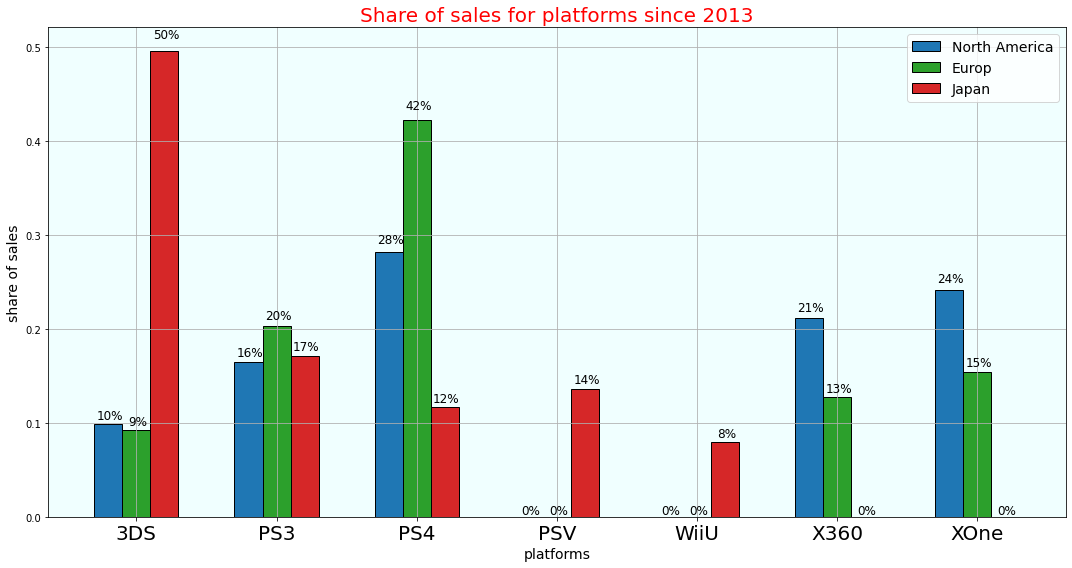

In [48]:
bars_plot(platforms_by_region, 7, 'Share of sales for platforms since 2013', 'platforms','share of sales')

При сравнимой структуре Топ5-платформ в Северной Америке и Европе (в Америке доля "национальных" платформ на 8-9% выше), предпочтения пользователей из Японии значительно отличаются. В пять наиболее популярных консолей в Японии входят только техника японских компаний. 58% занимают платформы производства Nintendo, остальное призодится на долю техники корпорации Sony.
Это может быть связано с популярностью в Японии видеоигр, релизы которых происходили только на указанных консолях (например, серии Покемон и Супер Марио, манга-игры). 


---



Оценим самые популярные жанры для пользователей разных регионов на основе данных количестве проданных копий игр.

In [49]:
NA_genre_top5=df.query('year_of_release>=2013').pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales',ascending=False).head(5)
EU_genre_top5=df.query('year_of_release>=2013').pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',ascending=False).head(5)
JP_genre_top5=df.query('year_of_release>=2013').pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',ascending=False).head(5)

Добавим столбец, отражающий долю каждого жанра в суммарных продажах Топ5-жанров по регионам. 

In [50]:
NA_genre_top5['na_share_of_sales']=NA_genre_top5.na_sales/sum(NA_genre_top5.na_sales)
EU_genre_top5['eu_share_of_sales']=EU_genre_top5.eu_sales/sum(EU_genre_top5.eu_sales)
JP_genre_top5['jp_share_of_sales']=JP_genre_top5.jp_sales/sum(JP_genre_top5.jp_sales)

In [51]:
genres_by_region=NA_genre_top5.join(EU_genre_top5,how='outer').join(JP_genre_top5,how='outer').fillna(0)

Построим графически распределение долей жанров.

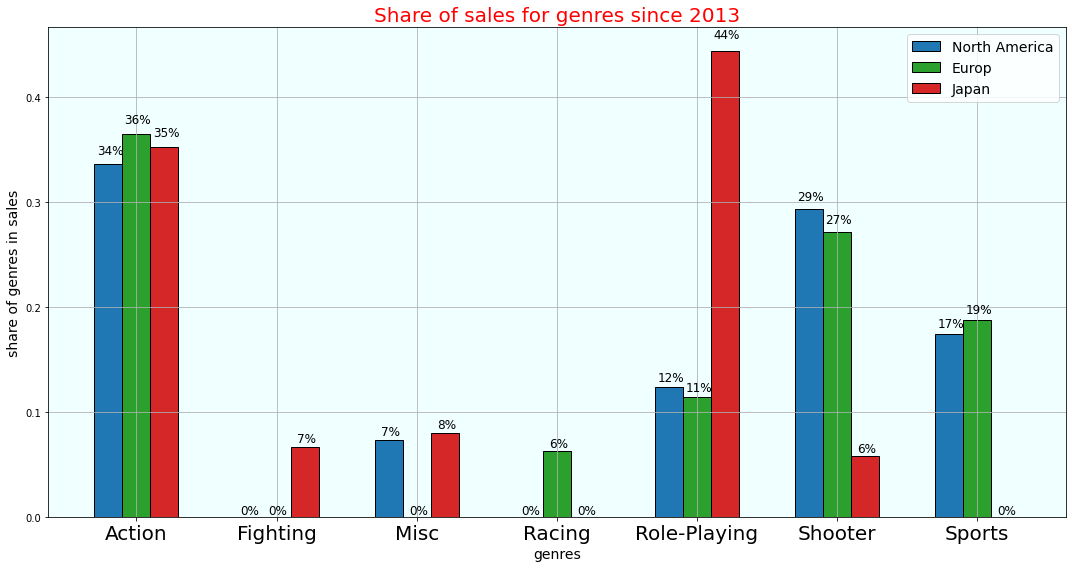

In [52]:
bars_plot(genres_by_region, 7, 'Share of sales for genres since 2013', 'genres','share of genres in sales')

Структуры жанровых предпочтений пользователей разных регионов имеют значительные различия. При, практически, одинаковой доле, приходящейся на игры жанра экшн (хотя состав топ игр этого жанра для Японии отличается от остальных регионов), остальная часть структуры индивидуальна для каждого региона.

Уже упомянутые игры из вселенных Покемона и Братье Марио, выпущенные на 3DS и WiiU подняли популярность жанров файтинг и РПГ выше, чем в остальных регионах.

Увлеченность Minecraft'ом в большей степени разделяют пользователи из Северной Америки и Японии. Их можно считать поклонниками жанра "песочницы" (Misc).

Марио карт вывел пользователей из Европы в лидеры поклонников гонок. На жанр Racing здесь приходится 6% продаж игр.

Благодаря играм серии Call of Duty для платформ Sony на долю стрелялок (Shooter) в Северной Америке и Европе приходится почти треть продаж.

Высокая популярность созерцания матчей национальных игровых видов спорта в Америке и Европе подняла в этих регионах продажи игр серии NBA и FIFA, а значит и долю жанра спортивных симуляторов.


---



Оценим влияет ли рейтинг ESRB на продажи в отдельном регионе. 

In [53]:
NA_rating_top5=df.query('(year_of_release>=2013)and(rating!="-")').pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales',ascending=False).head(5)
EU_rating_top5=df.query('(year_of_release>=2013)and(rating!="-")').pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',ascending=False).head(5)
JP_rating_top5=df.query('(year_of_release>=2013)and(rating!="-")').pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',ascending=False).head(5)

Добавим столбец, отражающий долю игр каждого рейтинга в суммарных продажах по регионам. 

In [54]:
NA_rating_top5['na_share_of_sales']=NA_rating_top5.na_sales/sum(NA_rating_top5.na_sales)
EU_rating_top5['eu_share_of_sales']=EU_rating_top5.eu_sales/sum(EU_rating_top5.eu_sales)
JP_rating_top5['jp_share_of_sales']=JP_rating_top5.jp_sales/sum(JP_rating_top5.jp_sales)

In [55]:
ratings_by_region=NA_rating_top5.join(EU_rating_top5,how='outer').join(JP_rating_top5,how='outer').fillna(0)

Данные включают игры четырех гатегорий в соотвествии с рейтингами Entertainment Software Rating Board:

«E» («Everyone») — «Для всех»

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

«T» («Teen») — «Подросткам»

«M» («Mature») — «Для взрослых»

Построим графическое распределение данных.

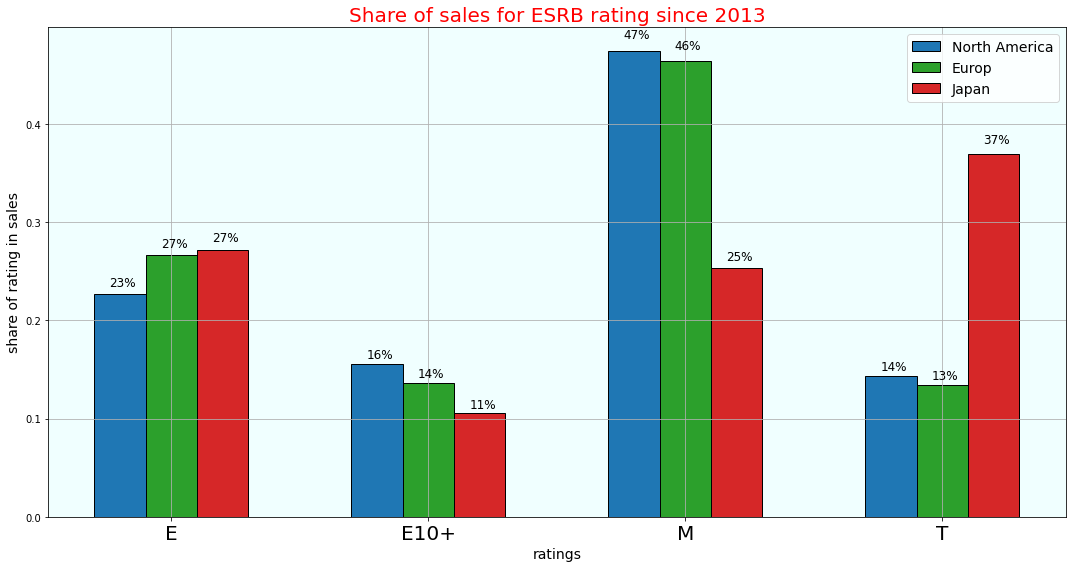

In [56]:
bars_plot(ratings_by_region, 4, 'Share of sales for ESRB rating since 2013', 'ratings','share of rating in sales')

Графические данные дополняют портрет пользователя каждого региона. Продажи игр по возрастным рейтингам, похожие для Америки и Европы, существенно отличаются для Японии.

Для Северной Америки и Европы соотношение несовершеннолетних и взрослых среди потребителей видеоигр примерно составляет 50/50. В то время, как среди японцев на долю детей и подростков приходится 3/4 проданных игр.

Это укладывается в предыдущие выводы о том, что существуют отличия портрета пользователя для региона Япония от пользователей остальных исследованных регионов.

Проверим возрастное распределение игр, проданных на ранее не исследованных рынках.

In [57]:
ROW_rating_top5=df.query('(year_of_release>=2013)and(rating!="-")').pivot_table(index='rating', values='other_sales', aggfunc='sum').sort_values(by='other_sales',ascending=False).head(5)
ROW_rating_top5['other_share_of_sales']=ROW_rating_top5.other_sales/sum(ROW_rating_top5.other_sales)
ROW_rating_top5['other_share_of_sales'].apply(lambda x: format(x, '.1%'))

rating
M       48.7%
E       23.4%
T       14.8%
E10+    13.0%
Name: other_share_of_sales, dtype: object

Распределение в большой степени совпадает с определенным для Северной Америки.



---



## **Формулировка и проверка статистических гипотез**<a class="anchor" id="hypotheses"></a>

#### **Проверка гипотезы о равенстве средних значений пользовательских отзывов для игр на платформах Xbox One и PC**

Создадим выборки игр для платформ Xbox One и PC, выпущенных за релевантный период, для которых существуют значения пользовательского рейтинга.

In [58]:
XOne_user_rating=df.query('(year_of_release>=2013) and (platform=="XOne") and (user_score!=(-1))').user_score

In [59]:
PC_user_rating=df.query('(year_of_release>=2013) and (platform=="PC") and (user_score!=(-1))').user_score

Необходимо проверить случайны ли полученные значения средних по двум выборкам при условии верности гипотезы, что средние значения пользовательских отзывов для игр на платформах Xbox One и PC не отличаются.

Таким образом:
- H0 - средние значения пользовательского рейтинга равны;
- H1 - средние значения пользовательского рейтинга отличаются.

In [60]:
pd.DataFrame(XOne_user_rating.describe().apply(lambda x: format(x, '.1f'))).join(pd.DataFrame(PC_user_rating.describe().apply(lambda x: format(x, '.1f'))),lsuffix='_XOne',rsuffix='_PC')


,user_score_XOne,user_score_PC
count,182.0,155.0
mean,6.5,6.3
std,1.4,1.7
min,1.6,1.4
25%,5.8,5.3
50%,6.8,6.8
75%,7.5,7.6
max,9.2,9.3


Для проверки гипотезы о равенстве средних двух независимых выборок количественных величин требуется определить отличается ли их распределение от нормального. Что означает, необхоимо проерить распределение выборочных средних выборочных совокупностей.

Для проверки распределения данных о пользовательских отзывах для игр на платформах Xbox One и PC проведем симуляцию. Построим распределение средних из 10% выборок взятых случайным образом из каждого ряда 10000 раз.

Для выборочных средних построим график квантилей и применим тест Шапиро-Вилка для определения вероятности получения таких или еще более отличающихся значений при условии, что данные распределены нормально.

In [61]:
def nd_of_means_check(data,n):
    result=[]
    for _ in range(n):
        result.append(np.mean(np.random.choice(np.array(data),size=round(len(data)*0.1),replace=False)))
    qqplot(pd.Series(result), line='s')
    plt.title('Proximity to the normal distribution (red line)', fontsize=12, color='black')
    plt.show()

    alpha = 0.05
    x,y = st.shapiro(result)
    print('p-значение:', y)
    if (y < alpha):
        print("Отвергаем нулевую гипотезу о нормальности распределения")
    else:
        print("Не получилось отвергнуть нулевую гипотезу о нормальности распределения")

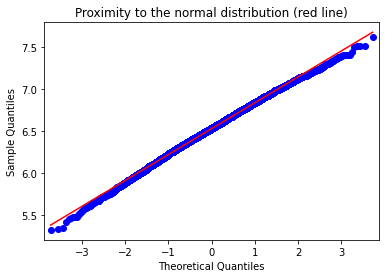

p-значение: 3.3829248735628425e-08
Отвергаем нулевую гипотезу о нормальности распределения


In [62]:
nd_of_means_check(XOne_user_rating,10000)

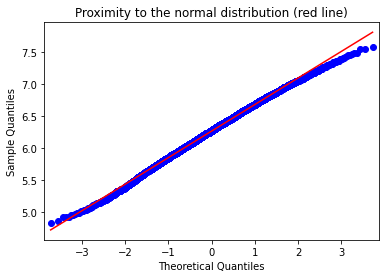

p-значение: 5.821571669173409e-09
Отвергаем нулевую гипотезу о нормальности распределения


In [63]:
nd_of_means_check(PC_user_rating,10000)

Проведенные тесты не позволяет считать, что наши данные распределены в соотвествии с функцией Гаусса. Однако графики квантилей десонстрируют близость распределения к нормальному. Что позволяет, помимо теста Манна-Уитни, применить для проверки нулевой гипотезы и тест Стьюдента.

Для проверки гипотезы о том, что средние значения пользовательских отзывов для игр на платформах Xbox One и PC не отличаются, применим U и t тесты, для теста Стьюдента параметр эквивалентности дисперсий зададим на основе результатов теста Левена.
Уроень значимости alpha примем в размере 5%.

In [64]:
def t_u_tests(test,data1,data2,alpha):
    equal_var=(st.levene(data1, data2).pvalue>alpha)
    if test=='t':
        results = st.ttest_ind(data1,data2, equal_var = equal_var)
    else:
        results = st.mannwhitneyu(data1,data2, alternative='two-sided')
    print('p-значение:', results.pvalue)
    if (results.pvalue < alpha):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу") 

Тест Манна-Уитни:

In [65]:
t_u_tests('u',XOne_user_rating,PC_user_rating,0.05)

p-значение: 0.5011006734622374
Не получилось отвергнуть нулевую гипотезу


Тест Стьюдента:

In [66]:
t_u_tests('t',XOne_user_rating,PC_user_rating,0.05)

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


На основании результатов проведенных тестов мы не можем утверждать, что пользовательские рейтинги для игр на платформах Xbox One и PC отличаются.

#### **Проверка гипотезы о том, что средние пользовательские рейтинги жанров Action и Sports разные.**

Создадим выборки игр, выпущенных за релевантный период, в жанрах Action и Sports для которых существуют значения пользовательского рейтинга.

In [67]:
Action_user_rating=df.query('(year_of_release>=2013) and (genre=="Action") and (user_score!=(-1))').user_score

In [68]:
Sports_user_rating=df.query('(year_of_release>=2013) and (genre=="Sports") and (user_score!=(-1))').user_score

Необходимо проверить случайны ли полученные значения средних по двум выборкам при условии верности гипотезы, что средние значения пользовательских отзывов для игр в жанрах Action и Sports не отличаются.

Таким образом:
- H0 - средние значения пользовательского рейтинга равны;
- H1 - средние значения пользовательского рейтинга отличаются.

In [69]:
pd.DataFrame(Action_user_rating.describe().apply(lambda x: format(x, '.1f'))).join(pd.DataFrame(Sports_user_rating.describe().apply(lambda x: format(x, '.1f'))),lsuffix='_A',rsuffix='_S')


,user_score_A,user_score_S
count,389.0,160.0
mean,6.8,5.2
std,1.3,1.8
min,2.0,0.2
25%,6.3,4.1
50%,7.1,5.5
75%,7.8,6.5
max,9.1,8.8


Для проверки гипотезы о равенстве средних двух независимых выборок количественных величин требуется определить отличается ли их распределение от нормального. Что означает, необхоимо проерить распределение выборочных средних выборочных совокупностей.

Для проверки распределения данных о пользовательских отзывах для игр жанров Action и Sports проведем симуляцию. Построим распределение средних из 10% выборок взятых случайным образом из каждого ряда 10000 раз.

Для выборочных средних построим график квантилей и применим тест Шапиро-Вилка для определения вероятности получения таких или еще более отличающихся значений при условии, что данные распределены нормально.

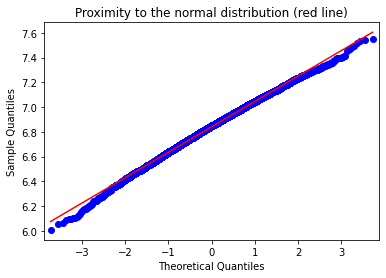

p-значение: 1.6226084365023041e-10
Отвергаем нулевую гипотезу о нормальности распределения


In [70]:
nd_of_means_check(Action_user_rating,10000)

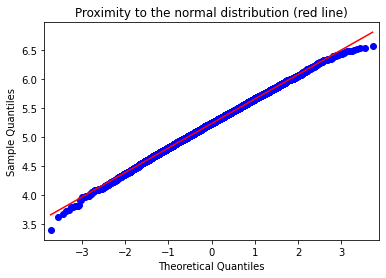

p-значение: 0.0009568881941959262
Отвергаем нулевую гипотезу о нормальности распределения


In [71]:
nd_of_means_check(Sports_user_rating,10000)

Проведенные тесты не позволяет считать, что все наши данные распределены в соотвествии с функцией Гаусса. Однако графики квантилей демонстрируют близость распределения к нормальному. Что позволяет, помимо теста Манна-Уитни, применить для проверки нулевой гипотезы и тест Стьюдента.

Для проверки гипотезы о том, что средние значения пользовательских отзывов для игр жанров Action и Sports не отличаются, применим U и t тесты, для теста Стьюдента параметр эквивалентности дисперсий зададим на основе результатов теста Левена.
Уроень значимости alpha примем в размере 5%.

Тест Манна-Уитни:

In [72]:
t_u_tests('u',Action_user_rating,Sports_user_rating,0.05)

p-значение: 1.5189170584819927e-23
Отвергаем нулевую гипотезу


Тест Стьюдента:

In [73]:
t_u_tests('t',Action_user_rating,Sports_user_rating,0.05)

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


На основании результатов проведенных тестов мы не можем утверждать, что пользовательские рейтинги для игр жанров Action и Sports не отличаются.



---



---



In [74]:
new_games=df.query('year_of_release>=2015')
new_games['non_jp_sales']=new_games.na_sales+new_games.eu_sales+new_games.other_sales

In [75]:
non_jp_games_pool=new_games.sort_values(by='non_jp_sales',ascending=False).head(10)
non_jp_games_pool=non_jp_games_pool.reset_index()[['name','platform','year_of_release','genre','non_jp_sales','rating']]

**ТОП10 перспективных новинок для рынков Америки, Европы и других стран**

In [76]:
non_jp_games_pool

,name,platform,year_of_release,genre,non_jp_sales,rating
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,14.27,-
1,FIFA 16,PS4,2015,Sports,8.52,E
2,Star Wars Battlefront (2015),PS4,2015,Shooter,7.76,-
3,FIFA 17,PS4,2016,Sports,7.52,E
4,Call of Duty: Black Ops 3,XOne,2015,Shooter,7.38,-
5,Fallout 4,PS4,2015,Role-Playing,6.93,M
6,Uncharted 4: A Thief's End,PS4,2016,Shooter,5.20,T
7,Pokemon Sun/Moon,3DS,2016,Role-Playing,4.88,-
8,Uncharted: The Nathan Drake Collection,PS4,2015,Action,4.54,T
9,Halo 5: Guardians,XOne,2015,Shooter,4.46,T


In [77]:
jp_games_pool=new_games.sort_values(by='jp_sales',ascending=False).head(10)
jp_games_pool=jp_games_pool.reset_index()[['name','platform','year_of_release','genre','jp_sales','rating']]

**ТОП10 перспективных новинок для рынка Японии**

In [78]:
jp_games_pool

,name,platform,year_of_release,genre,jp_sales,rating
0,Monster Hunter X,3DS,2015,Action,2.79,-
1,Yokai Watch Busters,3DS,2015,Action,2.29,-
2,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.26,-
3,Splatoon,WiiU,2015,Shooter,1.46,E10+
4,Animal Crossing: Happy Home Designer,3DS,2015,Simulation,1.40,E
5,Yokai Watch 3,3DS,2016,Action,1.33,-
6,Super Mario Maker,WiiU,2015,Platform,0.94,E
7,Monster Strike 3DS,3DS,2015,Action,0.87,-
8,Dragon Quest VIII: Journey of the Cu...,3DS,2015,Role-Playing,0.86,T
9,Rhythm Heaven: The Best+,3DS,2015,Misc,0.72,-




---



---



## **Выводы и рекомендации** <a class="anchor" id="summary"></a>

Считаем целесообразным формирование отдельных продуктовых матриц для рынка Японии и рынков других стран, на основе определенных портретов покупателей. Необходимость диифференцирования связана, например, с тем, что на популярные в Японии игровые платформы Nintendo 3DS и WiiU, Sony PlayStation Vita, для которых суммарный тираж игр состаляет 72% всех продаж местного рынка, в Северной Америке и Европе в период с 2013 по 2016 годы приходится 9-10% оборота.

**Рынки Северной Америки, Европы и другие не-азиатские:**
1. Рекомендуется в 2017 году приоритетно формировать ассортимент игр, предлагаемых на не-азиатских рынках для консолей Sony PlayStation 4, Microsoft Xbox One и Nintendo 3DS (62-66% проданных в 2013-2016гг игровых копий).
2. Перспекивными игровыми жанрами для этих рынков можно считать шутеры, спортивные симуляторы, экшн и РПГ(доля рынка 92-98%).
3.  Целевой аудиторией следует считать широкую возрастную группу, в равном  соотношении преобретающих игры рассчитанные на юного и взрослого игромана.
4. Стартовый пул новых потенциально популярных игр: 'Call of Duty: Black Ops 3' (для платформ PS4 и XOne), 'FIFA 16',  'FIFA 17','Star Wars Battlefront (2015)', 'Fallout 4', "Uncharted 4: A Thief's End" и  'Uncharted: The Nathan Drake Collection', 'Pokemon Sun/Moon', 'Halo 5: Guardians'.

**Рынок Японии:**
1. Рекомендуется в 2017 году приоритетно формировать ассортимент игр, предлагаемых на японском рынке для консолей Nintendo 3DS и WiiU, Sony PlayStation 4 (70% проданных копий). Четвертая популярная в Японии платформа  - Sony PlayStation Vita (14% рынка) в 2016 году была скомпроментирована появлением джейлбрейка, и, предположительно, в 2017 году продажи официальных релизов для этой портативной консоли могут пойти вниз.
2. Перспекивными игровыми жанрами для японского рынка можно считать шутеры и файтеры, песочницы, экшн и РПГ, которые в 2013-2016 году составяли 100% популярных направлений видеоигр.
3.  Целевой аудиторией следует считать возрастную группу покупателей до (условно) 18 лет.
4. Стартовый пул новых популярных игр: 'Monster Hunter X' и'Monster Strike 3DS', 'Yokai Watch Busters' и 'Yokai Watch 3', 'Pokemon Sun/Moon', 'Splatoon', 'Animal Crossing: Happy Home Designer', 'Super Mario Maker', Dragon Quest VIII: Journey of the Cursed King', 'Rhythm Heaven: The Best+'.

При добавлении в ассортимент новых релизов, может быть целесообразным учитывать рейтинги, присваиваемые экспертами рынка видеоигр. Корреляция суммарных проданных тиражей с бальным куммулятивом отзывов критиков в 41%, может свидетельствовать о том, что пользователи при планировании покупки игры не игнорируют рекомендации и впечатления экспертов.